In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import utils
def get_eval_data(checkpoint):
	checkpoint = torch.load(checkpoint)
	metrics = checkpoint['conf_flat']	
	data = [utils.print_metrics(m.compute()) for m in metrics]
	return data

In [4]:
t8_data = get_eval_data(B)
t9_data = get_eval_data(NB)

NameError: name 'get_eval_data' is not defined

In [ ]:
mIoU_t8 = [x['mIoU'] for x in t8_data]
mIoU_t9 = [x['mIoU'] for x in t9_data]
plt.subplots(figsize=(6, 4))
plt.grid()
plt.plot(mIoU_t9, marker='.', label='mIoU on reduced dataset')
plt.plot(mIoU_t8, marker='.', label='mIoU on full dataset')
plt.xticks(range(1,21))
plt.xlabel('epochs')
plt.ylabel('mIoU')
plt.legend(loc='lower right')
plt.show()

In [16]:
def get_means(data, group):
    return [np.mean(data[i:i+group]) for i in range(0, len(data), group)]
    

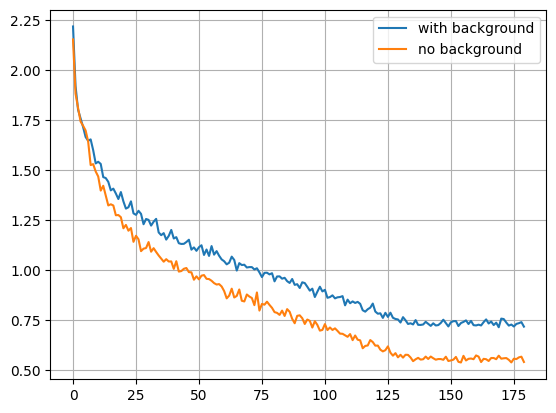

In [26]:
TL_B = torch.load(B)['training_loss_values']
TL_NB = torch.load(NB)['training_loss_values']
chunk = 100
cut = 180
plt.plot(get_means(TL_B, chunk)[:cut], label='with background')
plt.plot(get_means(TL_NB, chunk)[:cut], label='no background')
plt.grid()
plt.legend(loc='upper right')
plt.show()

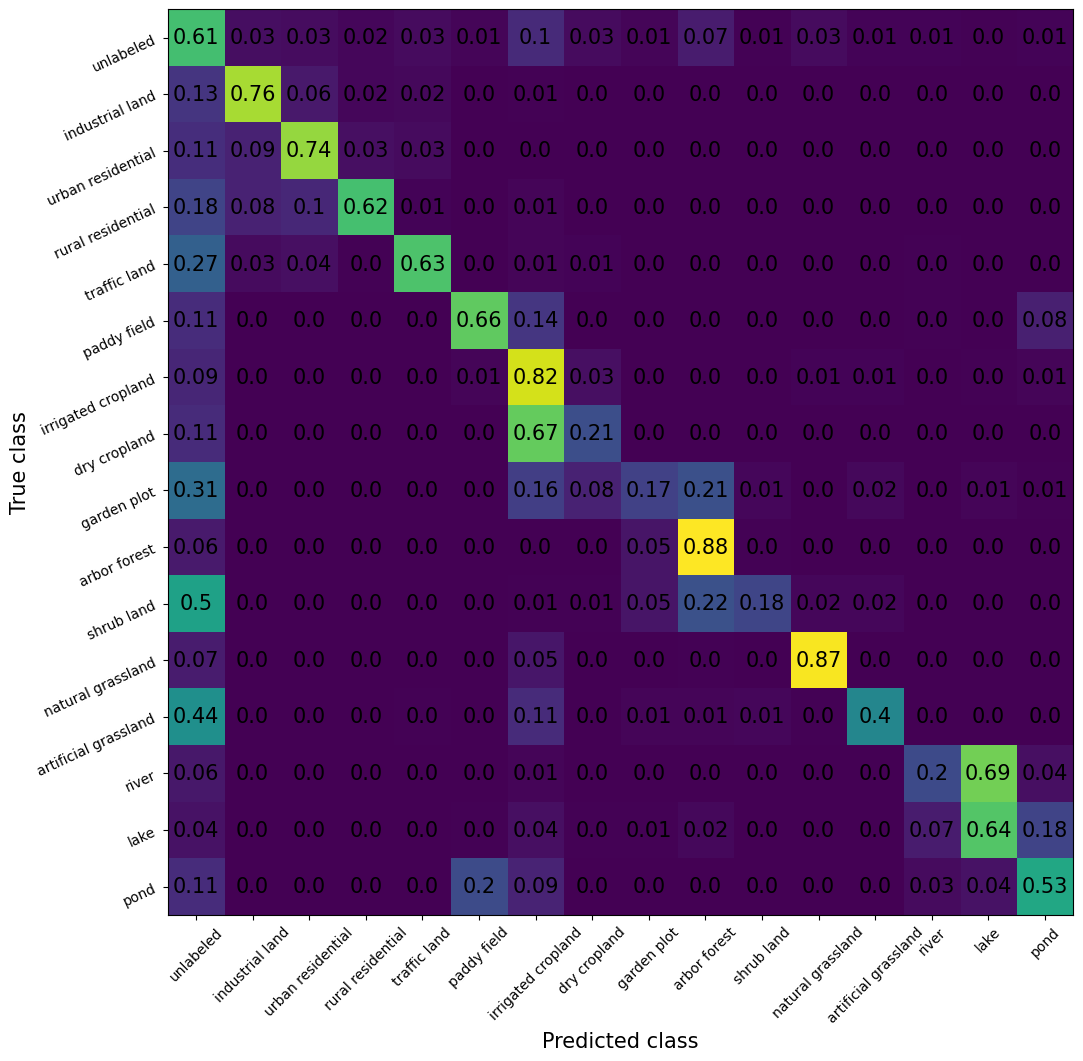

In [47]:
import utils
b_norm = torch.load(B)['conf_normalized'][-1]
b_flat = torch.load(B)['conf_flat'][-1]
nb_flat = torch.load(NB)['conf_flat'][-1]
nb_norm = torch.load(NB)['conf_normalized'][-1]
utils.plot_confusion(b_norm, 'bac_conf.png')

In [70]:
import utils
def convert_data_to_NB(flat):
	"""
	flat: MulticlassConfusionMatrix
	Function that computes mIoU excluding background
	from a flat confusion matrix that counts also unalbeled
	metrics. It zeroes out the first row and col and compute
	the metric.
	"""	
	flat.confmat[:,0] = 0
	flat.confmat[0,:] = 0
	m = flat.compute()	
	return utils.print_metrics(m)

In [8]:
def get_mIoUs(checkpoint):
    mats = torch.load(checkpoint)['conf_flat']
    return [utils.print_metrics(mat.compute(),silent=True)['mIoU'] for mat in mats]    


In [ ]:
B = "D:\\weights\\ablation\\background\\checkpoint50_B" # trained with background
NB = "D:\\weights\\ablation\\background\\checkpoint50_NB" # trained with NO back
print(get_mIoUs(NB))
